# 4. Exploratory Data Analysis

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

## 0. 라이브러리 준비

## 1. 분석의 목적과 변수 확인

## 2. 데이터 전체적으로 살펴보기

## 3. 데이터의 개별 속성 파악하기

## Embarked
선착장 별로 생존률을 그래프로 나타내었습니다.  
그 결과 선착장들의 신뢰구간이 거의 겹치지 않는 결과가 나왔고 C에서 가장 높은 생존률을 보이는 것을 확인할 수 있었습니다.  
이를 통해 선착장은 생존률과 유의미한 상관관계가 있는 feature인 것을 알 수 있습니다.

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?





## Embarked
선착장 별로 생존률을 그래프로 나타내었습니다.  
그 결과 선착장들의 신뢰구간이 거의 겹치지 않는 결과가 나왔고 C에서 가장 높은 생존률을 보이는 것을 확인할 수 있었습니다.  
이를 통해 선착장은 생존률과 유의미한 상관관계가 있는 feature인 것을 알 수 있습니다.

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

          Survived
Embarked          
C         0.553571
Q         0.389610
S         0.336957


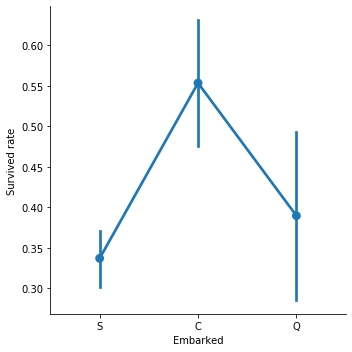

In [30]:
titanic_df = pd.read_csv("./train.csv")
titanic_df.corr()
print(titanic_df[['Embarked', 'Survived']].groupby('Embarked').mean())
sns.catplot(x = 'Embarked', y = 'Survived', kind = 'point', data = titanic_df) 
plt.ylabel("Survived Rate")
plt.show()

### Fare
이번엔 fare별로 생존률이 어떻게 되는지 kde그래프로 나타내 보았습니다.  
그 결과 확실히 낮은 가격을 지불한 사람에서 사망한 사람이 많이 나타나는 것을 확인 할 수 있습니다.  
Pclass와 Fare가 보통 비례하는 경우가 많기 때문에 Pclass때와 비슷한 결과가 나온 것을 알 수 있습니다.  

In [230]:
moves = chess_df['moves'].str.split(" ")
first_move = moves.apply(lambda x: x[:2])
first_move = pd.Series(first_move, name = 'first_move')
chess_df1 = pd.concat([chess_df, first_move], axis=1)

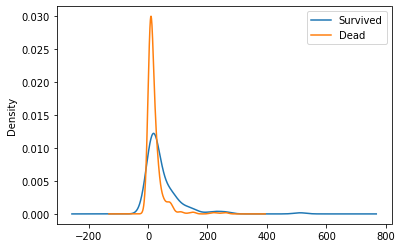

In [50]:
titanic_df[titanic_df['Survived'] == 1]['Fare'].plot(kind = 'kde')
titanic_df[titanic_df['Survived'] == 0]['Fare'].plot(kind = 'kde')
plt.legend(['Survived', 'Dead'])
plt.show()


### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]() 

## 데이터 선택
저는 Kaggle에서 Chess Game Dataset이라는 체스게임의 정보가 담겨져 있는 데이터셋을 선택하고 분석하였습니다.  
체스 게임에서 가장 중요한 것은 승리 이기 때문에 승리와 관련된 4가지의 유의미한 Feature를 찾고 분석해 보았으며 그 Feature는 아래와 같습니다. 
1. 흑, 백에 따른 승률
2. 오프닝에 따른 승률
3. rating의 차이에 따른 승률

In [124]:
chess_df = pd.read_csv('./games.csv')
chess_df.columns #20058 rows

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

## 흑, 백에 따른 승률
### 전체 승률
흔히 있는 말 중 모든 턴제 게임은 선공이 유리하다는 말이 있는데 과연 체스에서도 이러한 경향이 있을지 확인해 보았습니다.  
그 결과 흑의 승률은 약 45%, 백의 승률은 약 50%로 5%가량 차이가 날 정도로 큰 차이를 보이고 있었으며 백이 이길 확률은 흑보다 11%나 높게 나온 것을 확인 할 수 있었습니다. 하지만 이러한 경향은 플레이어의 실력에 따라 달라질 수 있다는 생각이 들어서 rating에 따른 승률도 분석해보았습니다.

white    49.860405
black    45.403330
draw      4.736265
Name: winner, dtype: float64


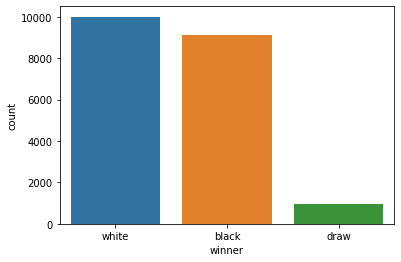

In [125]:
winrate = chess_df['winner'].value_counts() / chess_df['winner'].count() * 100
print(winrate)
sns.countplot(x = 'winner', data = chess_df)
plt.show()

### rating에 따른 승률
white_rating과 black_rating을 평균을 낸 avg_rating이라는 Series를 추가해 주어서 해당 게임의 평균 rating을 알 수 있도록 한후 평균 rating에 따른 승리한 색의 분포를 kdeplot을 이용하여 그려보았습니다.

그 결과 레이팅이 낮은곳에서는 미세하게 백이 높은 승률을 가지고 있었고 레이팅이 높은곳에서는 흑이 미세하게 높은 승률을 가지고 있었습니다. 그러나 두 그래프는 거의 비슷한 모양을 가지고 있는 것과 다르게 무승부에 대한 그래프는 다른 형태를 띄고 있었습니다. 그래프를 보면 높은 rating에서 확실히 많은 무승부가 일어나는 것을 알 수 있습니다.

In [271]:
avg_rating = (chess_df['white_rating'] + chess_df['black_rating'])/2
avg_rating = pd.Series(avg_rating, name = 'avg_rating')
chess_df0 = pd.concat([chess_df, avg_rating], axis=1)


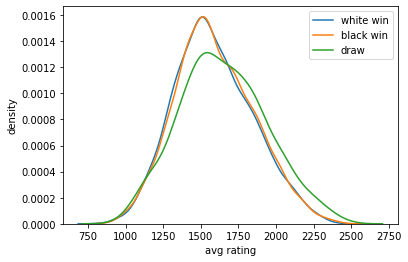

In [283]:
sns.kdeplot(chess_df1[chess_df1['winner'] == 'white']['avg_rating'])
sns.kdeplot(chess_df1[chess_df1['winner'] == 'black']['avg_rating'])
sns.kdeplot(chess_df1[chess_df1['winner'] == 'draw']['avg_rating'])
plt.xlabel('avg rating')
plt.ylabel('density')
plt.legend(['white win', 'black win', 'draw'])
plt.show()


이러한 경향을 좀더 자세히 분석해 보기 위해 백, 흑, 무승부가 각각 어느 rating에서 많이 일어나는지 catplot을 이용하여 분석해보았습니다.  
그 결과 흑의 승리는 확실히 백의 승리보다 높은 rating에서 일어나고 있는 것을 알 수 있었으며 무승부는 확실히 실력이 있는 사람들 사이에서 많이 일어나고 있는 것을 확인 할 수 있었습니다.

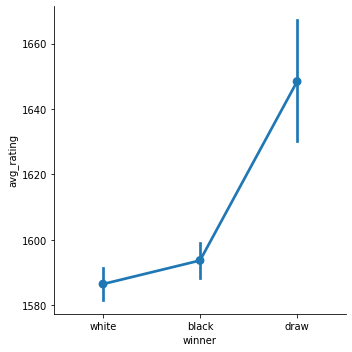

In [284]:
sns.catplot(x = 'winner', y = 'avg_rating', kind = 'point', data = chess_df1)
plt.show()

### 결론
전체 승률을 비교했을 때는 백의 승률이 높게 나왔지만 rating별로 추세를 확인 했을 때는 높은 rating에서는 흑이 승률이 높게 나온다는 경우도 있다는 것을 알 수 있었고 백이 무조건 유리하다는 말은 확실히 맞다고는 하기 힘들다고 생각합니다.  
또한 무승부는 확실히 실력이 높은 사람들에게서 주로 일어난다는 사실 또한 알 수 있었습니다. 

## 오프닝에 따른 승률

### 오프닝 코드에 따른 승률
데이터에는 오프닝을 코드로 분류해놓은 opening_eco 라는 정보가 있었는데 이에 따라 흑, 백의 승률이 어떻게 달라지는지 분석해 보았습니다. 분석을 위해 일단 white, black, draw라는 문자열로 정보가 주어지는 winner를 다루게 쉽게하기 위해 백의 승률을 나타내는 숫자형 정보로 변환하였고 white는 1로 black 은 0으로 draw는 0.5로 값을 가지는 white_win이라는 새로운 series를 만들고 병합해주었습니다.  

그러나 오프닝 코드의 종류는 300여가지가 넘어가서 분석하기 어렵고 한두번만 쓰인 코드들은 승률이 1, 0과같은 극단적인 값이 나오기 때문에 빈도가 200회 이상 넘어가는 오프닝만 추출해서 백의 승률을 분석하였습니다.  

그렇게 25개의 오프닝코드에서의 백의 승률을 분석한 결과 백의 승률이 가장 낮은 코드는 약 41%인 **A00**, 백의 승률이 가장 높은 코드는 약 62%인 **B00**이 나왔습니다. 이 결과로 백의 입장이라면 B00오프닝을, 흑의 입장이라면 A00오프닝을 유도하는 것이 승리할 확률을 높일 수 있다는 사실을 알 수 있었습니다.  

In [264]:
white_win = chess_df['winner'].apply(lambda x: ((x=='white') + (x!='black'))/2)
white_win = pd.Series(winner2, name = 'white_win')
chess_df0 = pd.concat([chess_df, white_win], axis = 1)

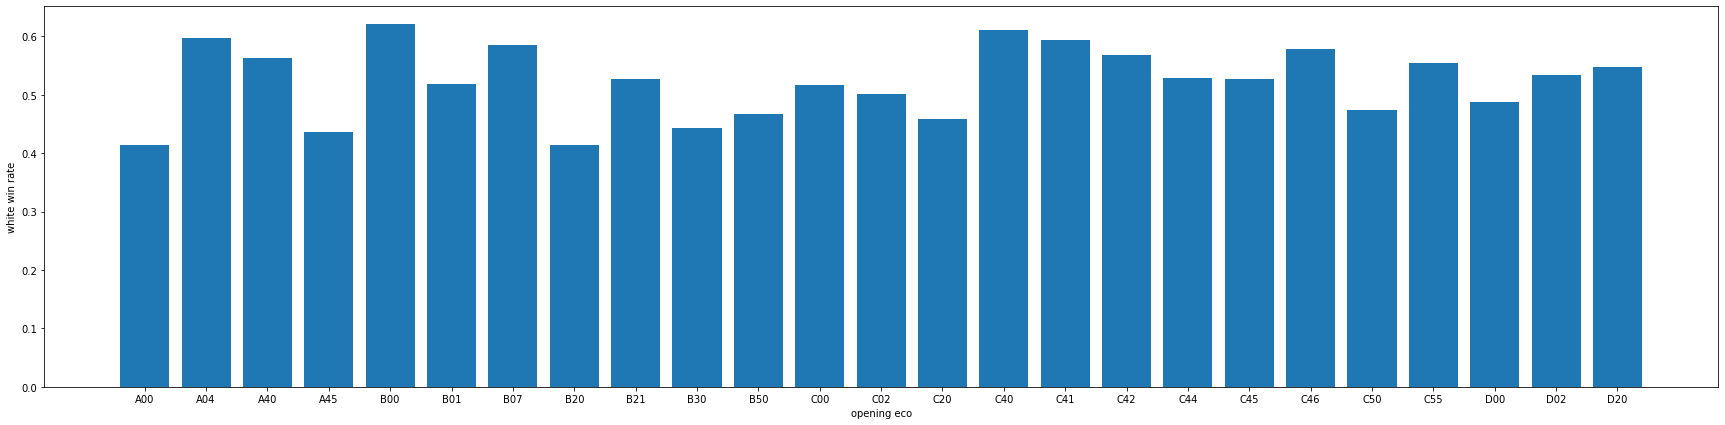

,white_win
opening_eco,
A00,0.414598
A04,0.596491
A40,0.562298
A45,0.436508
B00,0.620295
B01,0.518156
B07,0.585526
B20,0.414462
B21,0.527426


In [328]:
grouped_count = chess_df1[['white_win', 'opening_eco']].groupby('opening_eco').count()
grouped_sum = chess_df1[['white_win', 'opening_eco']].groupby('opening_eco').sum()

grouped = grouped_sum[grouped_count>=200] / grouped_count[grouped_count >= 200]
grouped = grouped.dropna(axis = 0)
plt.figure(figsize = (30,7))
plt.ylabel("white win rate")
plt.xlabel("opening eco")
plt.bar(x = grouped['white_win'].index, height = grouped['white_win'])
plt.show()
grouped

### 첫 수에 따른 승률
위와 같이 분석을 해보았지만 오프닝 코드가 뭔지 잘 모르고 오프닝을 유도하는 것은 상대도 원하는 대로 움직여줘야하기 때문에 힘든 일이라 생각하여 첫 수에 대해서만 승률을 분석해 보았습니다.

일단 체스경기의 전체 기보가 담긴 moves에서 첫 수의 대한 정보만 추출해서 first_move라는 새로운 series를 만들고 병합해주었습니다. 그리고 위에서 만들었던 white_win을 그대로 사용하여 첫수에 따른 승률도 분석하였습니다. 

위와 마찬가지로 개수가 200개 이상되는 첫수만 뽑아내었으며 그 결과 5개의 첫수에 대한 승률을 알 수 있었고 백의 입장에서 봤을 때 가장 낮은 승률은 **e3**즉 킹앞의 폰을 두칸 우직이는 경우가 가장 승률이 좋지않은 결과가 나왔고 가장 높은 승률은 **Nf3**로 오른쪽 나이트를 왼쪽위로 이동하는 것이 가장 좋은 승률을 나타내는 것을 알 수 있었습니다. 

In [324]:
moves = chess_df['moves'].str.split(" ")
first_move = moves.apply(lambda x: x[:1])
first_move = first_move.apply(lambda x: "".join(x))
first_move = pd.Series(first_move, name = 'first_move')
chess_df2 = pd.concat([chess_df0, first_move], axis=1)

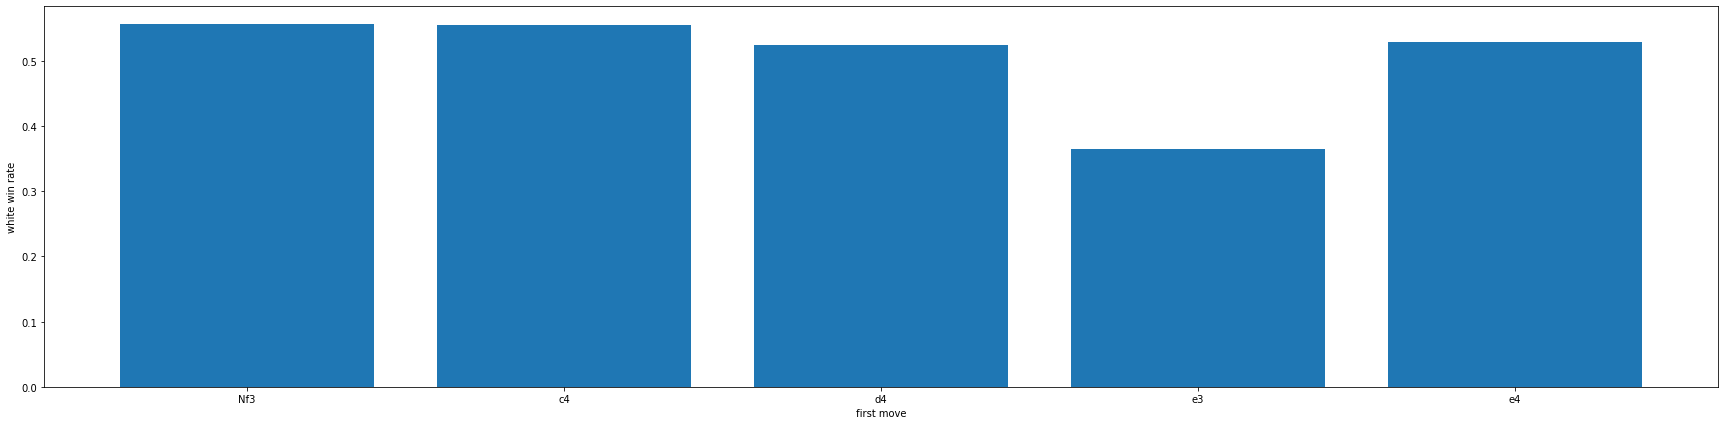

,white_win
first_move,
Nf3,0.555862
c4,0.554469
d4,0.523773
e3,0.364183
e4,0.528576


In [325]:
grouped_count = chess_df2[['white_win', 'first_move']].groupby('first_move').count()
grouped_sum = chess_df2[['white_win', 'first_move']].groupby('first_move').sum()

grouped = grouped_sum[grouped_count>=200] / grouped_count[grouped_count >= 200]
grouped = grouped.dropna(axis = 0)
plt.figure(figsize = (30,7))
plt.ylabel("white win rate")
plt.xlabel("first move")
plt.bar(x = grouped['white_win'].index, height = grouped['white_win'])
plt.show()
grouped

### 첫 두 수에 대한 승률
이렇게만 분석하면 흑을 플레이할때는 어떻게 하는게 좋은지 알 수 없으므로 같은 방법으로 이번에 흑이 대응하는 수까지 포함하여 두 수에 대한 정보를 같은 방법으로 분석하였습니다.

그 결과 14개의 플레이에 대한 승률을 분석해 볼수 있었고 가장 승률이 낮은 수는 35%의 승률인 e3e5, 가장 승률이 높은 수는 63%로 e4Nc6이 나온 것을 알 수 있었습니다.  

이로 인해 흑은 백이 e3을 해줬다면 웃으면서 **e5**로 맞대응을 하면 이길확률은 65%로 높게 나온다는 것을 알 수 있고 백이 e4를 했을 때 **Nc6**으로 대응하는 것은 37%로 승률이 낮다는 사실을 인지해야 한다는 생각을 할 수 있었습니다. 

이러한 첫두수와 오프닝코드가 연관이 있지 않을까 싶어 오프닝코드를 찾아본 결과 **e3e5는 백에서 승률이 가장 좋지 않았던 A00**오프닝의 시작 기보였고 **e4Nc6는 백에서 승률이 가장 높았던 B00**의 시작 기보였습니다. 

별 생각없이 그냥 분석만 해봤는데 오프닝코드와 첫 두수의 대한 승률에 최대와 최소가 일치한다는 사실이 매우 놀라웠고 오프닝과 첫 수가 승률에 대해서 같은 상관관계를 가지고 있는 것을 알 수 있었습니다. 

In [326]:
moves = chess_df['moves'].str.split(" ")
first_move = moves.apply(lambda x: x[:2])
first_move = first_move.apply(lambda x: "".join(x))
first_move = pd.Series(first_move, name = 'first_move')
chess_df2 = pd.concat([chess_df0, first_move], axis=1)

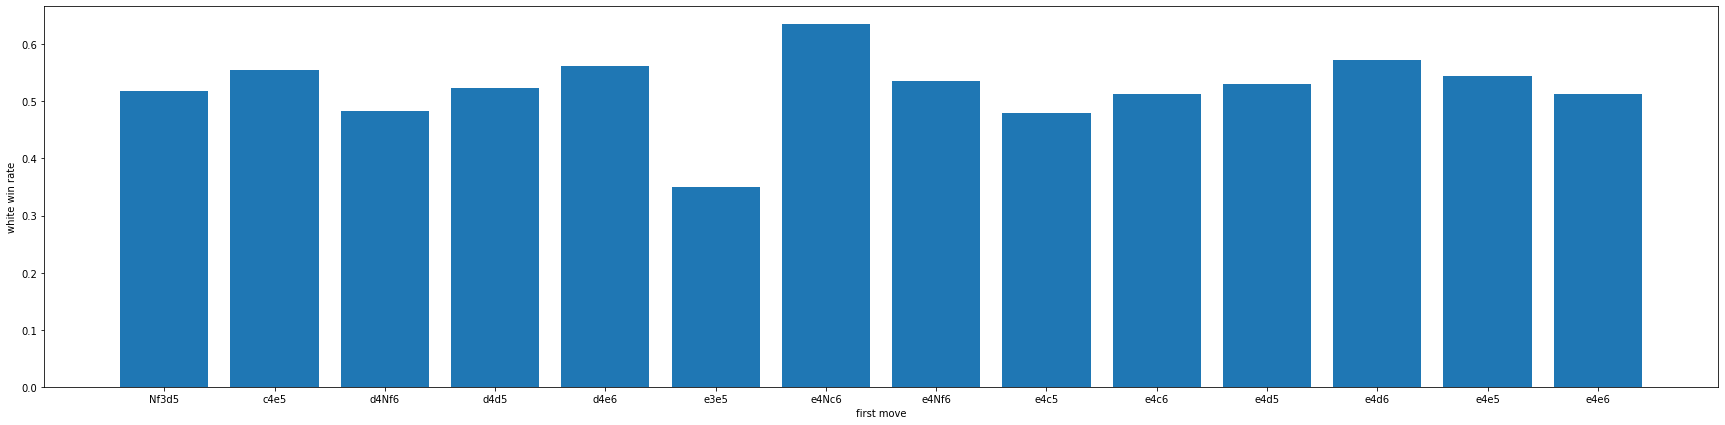

,white_win
first_move,
Nf3d5,0.517787
c4e5,0.555556
d4Nf6,0.482865
d4d5,0.524027
d4e6,0.562356
e3e5,0.350000
e4Nc6,0.634703
e4Nf6,0.534884
e4c5,0.480046


In [327]:
grouped_count = chess_df2[['white_win', 'first_move']].groupby('first_move').count()
grouped_sum = chess_df2[['white_win', 'first_move']].groupby('first_move').sum()

grouped = grouped_sum[grouped_count>=200] / grouped_count[grouped_count >= 200]
grouped = grouped.dropna(axis = 0)
plt.figure(figsize = (30,7))
plt.ylabel("white win rate")
plt.xlabel("first move")
plt.bar(x = grouped['white_win'].index, height = grouped['white_win'])
plt.show()
grouped

### 결론
백일때는 NFc3로 시작하고 흑입장에서 백이 e3을 했다면 e5로 대응하자!

## rating 차이에 따른 승률

과연 이 체스 사이트의 rating이 실력을 잘 대변해 주는지 확인하기 위 각 매치에서 각 선수의 rating차이와 승리자가 어떤 관계를 가지고 있는지 분석해 보았습니다.  

백의 rating에서 흑의 rating을 뺀 값을 새로운 열로 추가시켜주었고 백의 승리여부에 따라 분석해 보았습니다.

그 결과 차이가 클수록 백이 잘이기고 비슷하면 비기고 작을수록 흑이 잘이기는 정상적인 결과를 얻어낼 수 있었습니다.  

In [329]:
rate_diff = chess_df['white_rating'] - chess_df['black_rating']
rate_diff = pd.Series(rate_diff, name = 'rate_diff')
chess_df3 = pd.concat([chess_df0, rate_diff], axis = 1)

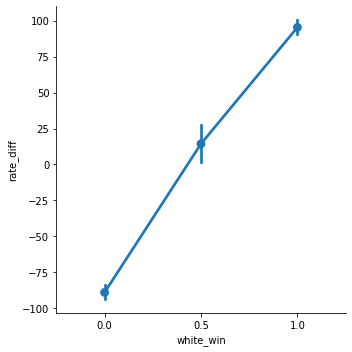

In [330]:
sns.catplot(x = 'white_win', y = 'rate_diff', kind = 'point', data = chess_df3)
plt.show()

## 결론

Lichess.org의 rating은 실제 실력과 밀접한 관련이 있으며 믿을만하다.